In [4]:
# Basic Libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & Model Training
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [5]:
# Load dataset
df = pd.read_csv("Water_Quality_Dataset.csv")

# Show first 5 rows
df.head()

,Timestamp,Location,pH,Turbidity (NTU),Temperature (°C),DO (mg/L),BOD (mg/L),Lead (mg/L),Mercury (mg/L),Arsenic (mg/L),Pollution_Level
0,2024-01-01 00:00:00,L4,8.762414,14.468306,16.461631,6.258335,2.478582,0.002801,0.001924,0.018769,2
1,2024-01-01 01:00:00,L5,7.477966,1.905645,27.446865,2.826120,8.048453,0.019551,0.000633,0.003708,2
2,2024-01-01 02:00:00,L3,7.938278,1.889506,34.623557,3.380191,2.102481,0.019291,0.000205,0.005055,2
3,2024-01-01 03:00:00,L5,8.728748,0.736115,18.802153,6.543794,6.714160,0.003358,0.001058,0.005638,2
4,2024-01-01 04:00:00,L5,7.975335,19.151777,30.851902,4.370861,2.114614,0.006059,0.000124,0.001237,2


In [6]:
# Shape and column details
print("Dataset Shape:", df.shape)
print("\nDataset Info:\n")
print(df.info())

# Check missing values
print("\nMissing Values:\n", df.isnull().sum())


Dataset Shape: (1000, 11)

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Timestamp         1000 non-null   object 
 1   Location          1000 non-null   object 
 2   pH                1000 non-null   float64
 3   Turbidity (NTU)   1000 non-null   float64
 4   Temperature (°C)  1000 non-null   float64
 5   DO (mg/L)         1000 non-null   float64
 6   BOD (mg/L)        1000 non-null   float64
 7   Lead (mg/L)       1000 non-null   float64
 8   Mercury (mg/L)    1000 non-null   float64
 9   Arsenic (mg/L)    1000 non-null   float64
 10  Pollution_Level   1000 non-null   int64  
dtypes: float64(8), int64(1), object(2)
memory usage: 86.1+ KB
None

Missing Values:
 Timestamp           0
Location            0
pH                  0
Turbidity (NTU)     0
Temperature (°C)    0
DO (mg/L)           0
BOD (mg/L)          0
L

In [7]:
# Fill numeric missing values with median
for col in df.select_dtypes(include=[np.number]).columns:
    df[col] = df[col].fillna(df[col].median())

# Fill categorical missing values with mode
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

print("✅ Missing values handled!")

✅ Missing values handled!


In [8]:
# Assume dataset has a "Pollution_Level" column (Safe/Moderate/Polluted)
# Adjust column name if different

label_encoder = LabelEncoder()
df["Pollution_Level"] = label_encoder.fit_transform(df["Pollution_Level"])

print("Encoded Classes:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

Encoded Classes: {0: 0, 1: 1, 2: 2}


In [9]:
X = df.drop("Pollution_Level", axis=1)
y = df["Pollution_Level"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Shape:", X_train.shape)
print("Testing Shape:", X_test.shape)

Training Shape: (800, 10)
Testing Shape: (200, 10)


In [11]:
# --- Handle Categorical Feature (Location) ---
df["Location"] = LabelEncoder().fit_transform(df["Location"])

# --- Separate Features & Target ---
X = df.drop(["Pollution_Level", "Timestamp"], axis=1)  # drop target + timestamp (not for training)
y = df["Pollution_Level"]

# --- Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Feature Scaling ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Training ready! Features used:", X.columns.tolist())

✅ Training ready! Features used: ['Location', 'pH', 'Turbidity (NTU)', 'Temperature (°C)', 'DO (mg/L)', 'BOD (mg/L)', 'Lead (mg/L)', 'Mercury (mg/L)', 'Arsenic (mg/L)']


In [13]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Train & Evaluate
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n📌 {name} Accuracy: {acc:.2f}")
    print(classification_report(y_test, y_pred, zero_division=0))



📌 Logistic Regression Accuracy: 0.93
              precision    recall  f1-score   support

           1       0.50      0.29      0.36        14
           2       0.95      0.98      0.96       186

    accuracy                           0.93       200
   macro avg       0.72      0.63      0.66       200
weighted avg       0.92      0.93      0.92       200


📌 Decision Tree Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.93      0.93      0.93        14
           2       1.00      0.99      1.00       186

    accuracy                           0.99       200
   macro avg       0.64      0.64      0.64       200
weighted avg       0.99      0.99      0.99       200


📌 Random Forest Accuracy: 0.99
              precision    recall  f1-score   support

           1       1.00      0.93      0.96        14
           2       0.99      1.00      1.00       186

    accuracy              

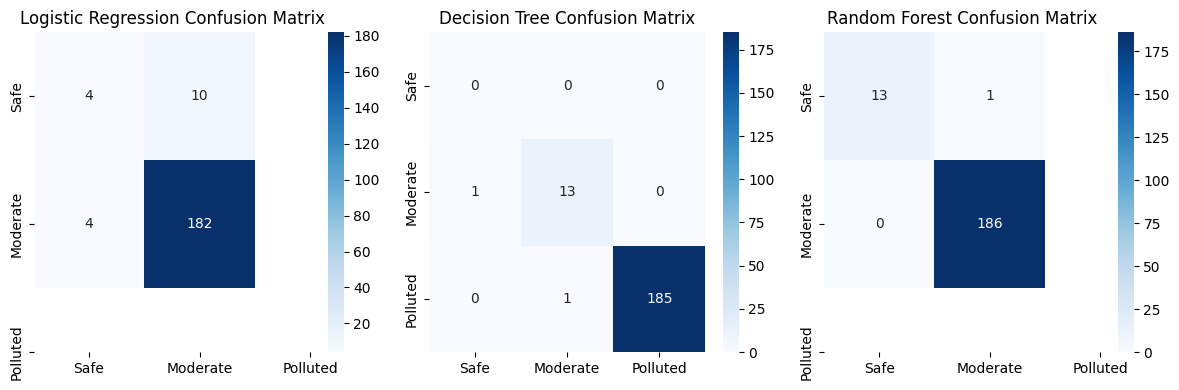

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

labels = ["Safe", "Moderate", "Polluted"]  # adjust if needed

plt.figure(figsize=(12,4))

for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)

    plt.subplot(1, 3, i+1)
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.title(f"{name} Confusion Matrix")

plt.tight_layout()
plt.show()

In [15]:
df.to_csv("Week2_Cleaned_Dataset.csv", index=False)
print("✅ Cleaned dataset saved as Week2_Cleaned_Dataset.csv")

✅ Cleaned dataset saved as Week2_Cleaned_Dataset.csv
